In [42]:
emotions = ["anger", "fear", "joy", "love", "sadness", "surprise"]

In [43]:
from nltk.corpus import nps_chat

posts = list(nps_chat.xml_posts())

In [44]:
dels = []

for i, p in enumerate(posts):
    if p.text == "JOIN" or p.text == "PART":
        dels.append(i)

for d in reversed(dels):
    del posts[d]

In [45]:
len(posts)

8530

In [46]:
import decks

In [47]:
net = decks.DecksNet(0.2)

Using 67:40 for hidden layers


In [48]:
import random

start = random.randint(0, len(posts) - 20)
start = 831
samples = [p.text for p in posts[start:start + 20]]

# 830, 831, 1919
start

831

In [49]:
import numpy as np

emo = net.emotion(np.array(samples))

In [50]:
for i in range(len(samples)):
    print(f"{emotions[np.argmax(emo[i])]:>7} : {np.round(emo[i], 3)} : {samples[i]}")

    joy : [0.245 0.193 0.273 0.057 0.2   0.032] : hello everyone
    joy : [0.245 0.193 0.273 0.057 0.2   0.032] : yes....
   fear : [0.163 0.514 0.259 0.002 0.057 0.004] : hey 10-19-30sUser29
  anger : [0.348 0.327 0.235 0.002 0.083 0.006] : oh you meant your other lover....lol
   fear : [0.236 0.534 0.214 0.    0.017 0.   ] : lmao 10-19-30sUser17... go figure you'd think that was about you
    joy : [0.004 0.002 0.993 0.    0.    0.   ] : yeah... cuz i have so many... lmao
    joy : [0.245 0.193 0.273 0.057 0.2   0.032] :  :-) 
   fear : [0.284 0.336 0.321 0.    0.058 0.   ] : gotta try...so seriously it wasn't meant for me.....lol
sadness : [0.242 0.002 0.149 0.004 0.603 0.   ] : <not sexy but can I stay?
sadness : [0.025 0.051 0.381 0.09  0.451 0.001] : lol
    joy : [0.449 0.036 0.512 0.    0.002 0.   ] : you keep passin' me around it's gotta stick sometime... lmao
sadness : [0.025 0.051 0.381 0.09  0.451 0.001] : lol 
   fear : [0.113 0.65  0.222 0.    0.015 0.   ] : with party h

In [51]:
con = net.predict(samples)
np.round(con, 3)

Tensor("decks_net_2/sequential_2/dense_5/Softmax:0", shape=(None, 6), dtype=float32)
1/1 [==============================] - 2s 2s/step


array([[0.741, 0.651, 0.491, 0.492, 0.463, 0.609],
       [0.741, 0.651, 0.491, 0.492, 0.463, 0.609],
       [0.756, 0.671, 0.477, 0.472, 0.465, 0.599],
       [0.771, 0.682, 0.468, 0.458, 0.463, 0.591],
       [0.785, 0.7  , 0.453, 0.438, 0.464, 0.578],
       [0.723, 0.597, 0.562, 0.531, 0.382, 0.678],
       [0.728, 0.609, 0.548, 0.524, 0.399, 0.665],
       [0.742, 0.622, 0.536, 0.509, 0.402, 0.654],
       [0.747, 0.659, 0.485, 0.484, 0.465, 0.604],
       [0.721, 0.644, 0.488, 0.502, 0.478, 0.607],
       [0.724, 0.615, 0.529, 0.525, 0.431, 0.641],
       [0.703, 0.609, 0.523, 0.536, 0.45 , 0.637],
       [0.732, 0.647, 0.496, 0.499, 0.461, 0.617],
       [0.774, 0.679, 0.466, 0.458, 0.468, 0.584],
       [0.777, 0.651, 0.497, 0.476, 0.43 , 0.609],
       [0.77 , 0.651, 0.496, 0.479, 0.437, 0.61 ],
       [0.752, 0.658, 0.478, 0.481, 0.473, 0.593],
       [0.727, 0.638, 0.494, 0.505, 0.47 , 0.609],
       [0.744, 0.639, 0.497, 0.498, 0.458, 0.608],
       [0.717, 0.628, 0.498, 0.

In [52]:
# ["anger", "fear", "joy", "love", "sadness", "surprise"]
np.argmax(con, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
np.round(net.context.path, 3)

array([[-0.164,  0.429,  0.047],
       [-0.164,  0.429,  0.047],
       [-0.2  ,  0.466,  0.028],
       [-0.23 ,  0.492,  0.034],
       [-0.269,  0.527,  0.021],
       [-0.025,  0.551,  0.133],
       [-0.053,  0.527,  0.116],
       [-0.086,  0.545,  0.113],
       [-0.18 ,  0.44 ,  0.042],
       [-0.145,  0.375,  0.022],
       [-0.084,  0.436,  0.102],
       [-0.069,  0.372,  0.07 ],
       [-0.141,  0.43 ,  0.033],
       [-0.242,  0.47 ,  0.052],
       [-0.192,  0.514,  0.122],
       [-0.186,  0.497,  0.107],
       [-0.202,  0.413,  0.061],
       [-0.147,  0.379,  0.054],
       [-0.162,  0.411,  0.089],
       [-0.131,  0.351,  0.059]])

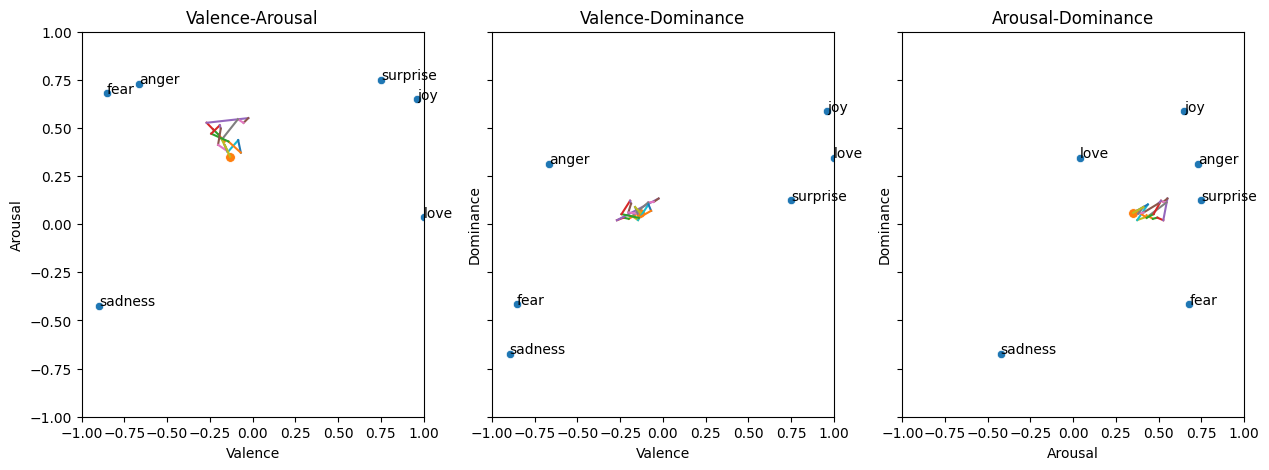

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
axes[0].set_xlim(-1, 1)
axes[0].set_ylim(-1, 1)

dims = {
    "Valence-Arousal": (0, 1),
    "Valence-Dominance": (0, 2),
    "Arousal-Dominance": (1, 2),
}

for i, (k, v) in enumerate(dims.items()):
    axes[i].set_title(k)
    axes[i].set_xlabel(k.split("-")[0])
    axes[i].set_ylabel(k.split("-")[1])

    sns.scatterplot(ax=axes[i], x=net.context.points[:, v[0]], y=net.context.points[:, v[1]])
    for j, text in enumerate(emotions):
        axes[i].annotate(text, (net.context.points[j, v[0]], net.context.points[j, v[1]]))

    for j in range(1, len(net.context.path)):
        sns.lineplot(ax=axes[i], x=net.context.path[j-1:j+1, v[0]], y=net.context.path[j-1:j+1, v[1]])
    sns.scatterplot(ax=axes[i], x=[net.context.path[-1, v[0]]], y=[net.context.path[-1, v[1]]], s=50)